In [1]:
import math
import numpy as np
import pandas as pd
from IPython.display import display
from matplotlib import pyplot as plt
#pd.set_option("display.precision", 4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', 30)

## Annuities
Source: http://www1.maths.leeds.ac.uk/~jitse/math1510/notes-ch2.pdf

- An annuity is a sequence of payments with fixed frequency. Originally annuities referred to annual payments only.
- A life-annuity pays regular income untill death. An annuity with fixed number of payments is called annuity certain. This note will focus on annuity certains.
- Annuity immediate: Regular series of payments at the end of every period. This note will focus exclusively on annual immediates.
- $i_{[p]}$: **interest rate** payble per compound (conversion) period $p$
- $i^{(p,t)} \equiv i^{(p)} = p \cdot i_{[p]}$: **nominal interest rate** payble per compound (conversion) period $p$ (usually months), quoted per base time unit $t$ (usually per annum, p.a.)
    - For example, 8% p.a. nominal interest rate payable quarterly means that payments are made at monthly frequency per rate of $i_{[1/4]} = \frac{8\%}{4} = 2\% $
    - For example, 2% p.m. nominal interest rate payable yearly means that payments are made at yearly frequency per rate of $i_{[12]} = 2\% * 12 = 24\% $

- $i^{(e,p,t)} \equiv i^{(e,p)}$: **Effective interest rate** corresponding to nominal interes rate $i^{(p)}$. It is the rate to be appliead at base time unit that yields equivalent interest accrual to conversion rate $i_{[p]}$. Can be solved for from $$1 + i^{(e,p)} = \big(  1 + \frac{i^{(p)}}{p} \big)^{p}$$ Above solved for $ i^{(p)} $: $$i^{(p)} = p \ \big[ \big( 1 + i^{(e,p)} \big)^{\frac{1}{p}} - 1 \big] $$ Above solved for $ i^{(e,p)} $: $$i^{(e,p)} = \big(  1 + \frac{i^{(p)}}{p} \big)^{p} - 1$$ 


** Accumulated value (or future value) of annuity after $n$ conversion periods:**

Accumulated value (or future value) of annuity (paying C units at the end of each conversion period)

$$cs_{n,i} = C \cdot s_{n,i} = C \cdot  \frac{\big(1+ i_{[p]} \big)^{np} - 1}{i_{[p]}}, \quad i_{[p]} \neq 0, \ n > 0$$

where $n$ denotes the amount of conversion periods, $i_{[p]}$ is the conversion period interest rate, and $C$ is the conversion period cash flow.

Many times parameters are not given for the conversion period (e.g. month) but rather for a base time unit (usually year), i.e. $i^{(p)}$ (there are $p$ conversion period in base period). For example, consider that interest rate is given quoted as p.a. Then simply we first have to calculate the per-conversion period interst rate from $i_{[p]} = \frac{i \ ^{(p)}}{p}$ and plug it into the formula above. If $i_{[p]}=0$ then $s_{n,i} = n$.

Notice that in section 2.4 of the reference paper there is a subtlety when calculating annuities payble e.g. monthly. Forward and present values in the reference already contain scaling by $p$, so that when the cash flow is introduced it is in the units of base time period of year. I don't prefer this approach but rather use conversion period units where-ever possible.

------------------------------
A special case of the $n$th period accumulated value is 0th period accumulate value $s_{0,i}$. This has a special name, *present value of annuity*. 

** Present value of n-period annuity**
Present value of n-period annuity paying $C$ units at the end of each conversion period is

$$ca_{n,i} = C \cdot a_{n,i} = C \cdot \frac{1 - \big(1+ i_{[p]} \big)^{-np}}{i_{[p]}}, \quad i \neq 0$$

If $i=0$ then $a_{n,i} = n$.


** Relationship between future value and present value of annuity**

$$a_{n,i}  = \frac{s_{n,i}}{(1+i_{[p]})^n} $$

### Examples

In [2]:
def annuity_pv(rate, nper, C):
    return C * ( 1 - math.pow( 1 + rate, -nper ) ) / (rate)

def annuity_fv(rate, nper, C):
    return C * ( math.pow( 1 + rate, nper ) -1 ) / (rate)

def annuity_pmt(rate, nper, pv):    
    x = math.pow(1 + rate, nper)
    return (pv * x * rate) / (x - 1)

In [3]:
# Example 2.4.2 from reference paper

# Base period yearly
n = 10 # number of years
p = 1/2 # how many times compounded yearly
i_p_effective = 0.07 # effective yearly interest rate. THIS IS NOT p.a. interest rate compounded once in two years
i_conv_nominal = p * ( math.pow(1+i_p_effective,1/p) - 1) # twice a year nominal rate, quoted at base interval
i_conv_effective = i_conv_nominal/p # twice a year effective rate
C_conv = 1000 # cash flow at conversion time unit

# Calculate and display present value
ca = annuity_pv(i_conv_effective, n*p, C_conv)
display(ca)

# Same using numpy's built in functions
display(np.pv(rate = i_conv_effective, nper = n*p, pmt = -C_conv, fv = 0, when = 'end'))


3393.0345608370053

3393.0345608370053

In [4]:
# Test from http://www.zenwealth.com/BusinessFinanceOnline/TVM/OtherCompounding.html
# Find the Present Value of an annuity of $100 per month for 2 years if the interest
# rate is 12% compounded monthly.

# Base period yearly
n = 2 # number of years
p = 12 # how many times compounded yearly
i_base_nominal = 0.12 # nominal rate quaoted at base interval
i_conv_effective = i_base_nominal/p # monthly effective rate
C_conv = 100 # cash flow at conversion time unit

# Calculate and display present value
ca = annuity_pv(i_conv_effective, n*p, C_conv)
display(ca)

# Same using numpy's built in functions
display(np.pv(rate = i_conv_effective, nper = n*p, pmt = -C_conv, fv = 0, when = 'end'))


2124.3387257627865

2124.338725762787

In [5]:
# Test from http://www.zenwealth.com/BusinessFinanceOnline/TVM/OtherCompounding.html
# Find the Future Value at the end of 3 years of an annuity of $100 per quarter for 
# 3 years if the interest rate is 8% compounded quarterly.

# Base period yearly
n = 3 # number of years
p = 4 # how many times compounded yearly
i_base_nominal = 0.08 # nominal rate quaoted at base interval
i_conv_effective = i_base_nominal/p # quarterly effective rate
C_conv = 100 # cash flow at conversion time unit

# Calculate and display present value
cs = annuity_fv(i_conv_effective, n*p, C_conv)
display(cs)

# Same using numpy's built in functions
display(np.fv(rate = i_conv_effective, nper = n*p, pmt = -C_conv, pv = 0, when = 'end'))


1341.2089728127273

1341.2089728127273

### Loan example from reference paper section 2.6

numpy pmt= 347.7617251391697, own function pmt = 347.7617251391697


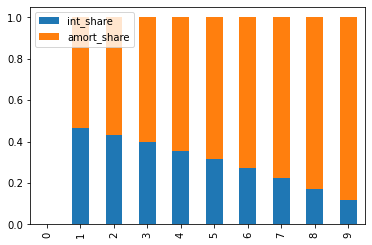

In [6]:
# Base interval year
pv = 2500 # loan amount
i_conv_effective = 0.065 # effective conversion period interest rate
n = 10 # number of conversion periods
nper = n

C_check = -np.pmt(rate = i_conv_effective, nper = nper, pv = pv, fv=0, when='end')
C = annuity_pmt(rate = i_conv_effective, nper = nper, pv = pv)
print("numpy pmt= {}, own function pmt = {}".format(C_check,C))

# Amount after k years
years_l = []
outs_l = []
intr_part_l = []
amorz_part_l = []
for k in range(nper):
    years_l.append(k)
    outs = -np.pv(rate=i_conv_effective, nper=nper-k, pmt=C, fv=0, when='end')
    #outs = annuity_pv(rate = i_conv_effective, nper = nper-k, C = C)    
    outs_l.append(outs)
    if k != 0:
        intr_part = i_conv_effective * -np.pv(rate = i_conv_effective, nper = nper-k+1, pmt = C, fv = 0, when = 'end')
        #intr_part = i_conv_effective * annuity_pv(rate = i_conv_effective, nper = nper-k+1, C = C)
        intr_part_l.append(intr_part)
        amorz_part_l.append(C - intr_part)
        continue
    intr_part_l.append(np.nan)
    amorz_part_l.append(np.nan)    
    
df = pd.DataFrame([years_l, outs_l, intr_part_l,amorz_part_l]).T
df.columns = ['year','out_bal','interest_part','amortization_part']
df['installment'] = C
df['int_share'] = df['interest_part'] / df['installment']
df['amort_share'] = df['amortization_part'] / df['installment']

_ = df[['int_share','amort_share']].plot.bar(stacked = True)

## Comparing amortization profiles between different loan term types

In [7]:
def main_calc(term_type, outs, n, p, rate_path):
    
    nper = n*p # number of conversion periods

    years_l = []
    outs_l = []
    intr_part_l = []
    amorz_part_l = []
    installment_l = []

    if term_type == "even_principal":
        amorz_part_fixed = outs / nper

    for k in range(nper+1):
        years_l.append(k)
        
        # Effective interest rate for curernt period
        i_conv_effective = rate_path[k]/p

        if k == 0:
            installment_l.append(np.nan)
            intr_part_l.append(np.nan)
            amorz_part_l.append(np.nan)
            outs_l.append(outs)        
        else:
            if term_type == "annuity":
                C = -np.pmt(rate=i_conv_effective, nper=nper-k+1, pv=outs, fv=0, when="end")                
                intr_part = i_conv_effective * -np.pv(rate=i_conv_effective, nper=nper-k+1, pmt=C, fv=0, when="end")            
                amorz_part = C - intr_part
                
            elif term_type == "even_principal":
                intr_part = i_conv_effective * outs            
                amorz_part = amorz_part_fixed
                C = amorz_part + intr_part

            # Save values to lists
            installment_l.append(C)
            intr_part_l.append(intr_part)
            amorz_part_l.append(amorz_part)

            # Update outstanding amount for next round
            outs = outs - amorz_part
            outs_l.append(outs)
        
    frame_out = calc_common_fields(years_l, outs_l, intr_part_l, amorz_part_l, installment_l)
    
    return frame_out 

def calc_common_fields(years_l, outs_l, intr_part_l, amorz_part_l, installment_l):

    frame_out = pd.DataFrame([years_l, outs_l, intr_part_l, amorz_part_l]).T
    frame_out.columns = ['year','out_bal','interest_part','amortization_part']
    frame_out['installment'] = installment_l
    frame_out['int_share'] = frame_out['interest_part'] / frame_out['installment']
    frame_out['amort_share'] = frame_out['amortization_part'] / frame_out['installment']
    frame_out["paid_interest"] = frame_out["interest_part"].cumsum()
    frame_out["paid_amortization"] = frame_out["amortization_part"].cumsum()
    frame_out["paid_installments"] = frame_out["installment"].cumsum()    

    return frame_out

def statistics(frame):

    # Amortization vs interest
    fig = plt.figure(figsize=(15, 5))
    ax = fig.add_subplot(1,2,1)
    frame[['interest_part','amortization_part']].plot.bar(stacked=True, ax=ax)
    every_nth = 12
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)

    ax = fig.add_subplot(1,2,2)
    frame[["out_bal", "paid_interest", "paid_amortization"]].plot(ax=ax)

    # Prints
    print("Cumulative interest paid: {:,.1f}".format(frame["interest_part"].sum()))

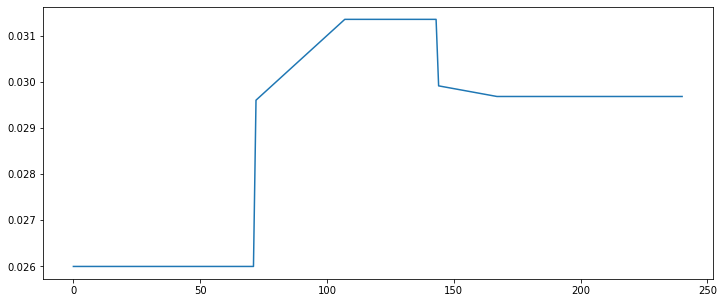

In [8]:
# Define interest rate path
years = 20
compound_periods = 12
periods = range(20*12+1)
base_rate = 0.026

# Constant rate
#per_annum_rate_path = [base_rate] * len(periods)

# Changing rate 
per_annum_rate_path = [0.026] * 6*compound_periods
per_annum_rate_path = per_annum_rate_path + [base_rate + x*0.00005 for x in periods[6*compound_periods:9*compound_periods]]
per_annum_rate_path = per_annum_rate_path + [per_annum_rate_path[-1]] * (12-9)*compound_periods
per_annum_rate_path = per_annum_rate_path + [per_annum_rate_path[-1] - x*0.00001 for x in periods[12*compound_periods:14*compound_periods]]
per_annum_rate_path = per_annum_rate_path + [per_annum_rate_path[-1]] * 6*compound_periods
per_annum_rate_path = per_annum_rate_path + [per_annum_rate_path[-1]]

len(per_annum_rate_path)
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1,1,1)
_ = ax.plot(periods, per_annum_rate_path)

### Annuity

Cumulative interest paid: 83,838.8


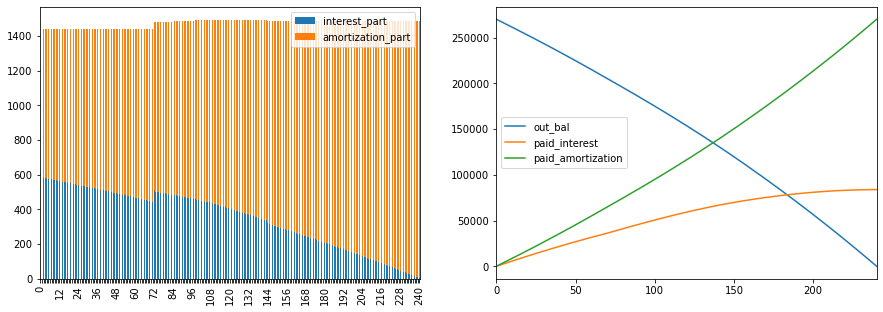

In [9]:
df = main_calc(
    term_type="annuity",
    outs=270000,
    n=20,
    p=12,
    rate_path=per_annum_rate_path
)
statistics(df)

In [10]:
df

,year,out_bal,interest_part,amortization_part,installment,int_share,amort_share,paid_interest,paid_amortization,paid_installments
0,0.0000,270000.0000,nan,nan,nan,nan,nan,nan,nan,nan
1,1.0000,269141.0723,585.0000,858.9277,1443.9277,0.4051,0.5949,585.0000,858.9277,1443.9277
2,2.0000,268280.2835,583.1390,860.7888,1443.9277,0.4039,0.5961,1168.1390,1719.7165,2887.8555
3,3.0000,267417.6297,581.2739,862.6538,1443.9277,0.4026,0.5974,1749.4129,2582.3703,4331.7832
4,4.0000,266553.1068,579.4049,864.5229,1443.9277,0.4013,0.5987,2328.8178,3446.8932,5775.7110
5,5.0000,265686.7108,577.5317,866.3960,1443.9277,0.4000,0.6000,2906.3495,4313.2892,7219.6387
6,6.0000,264818.4376,575.6545,868.2732,1443.9277,0.3987,0.6013,3482.0041,5181.5624,8663.5664
7,7.0000,263948.2832,573.7733,870.1545,1443.9277,0.3974,0.6026,4055.7774,6051.7168,10107.4942
8,8.0000,263076.2434,571.8879,872.0398,1443.9277,0.3961,0.6039,4627.6653,6923.7566,11551.4219
9,9.0000,262202.3142,569.9985,873.9292,1443.9277,0.3948,0.6052,5197.6638,7797.6858,12995.3497


### Even principal payments
https://www.extension.iastate.edu/agdm/wholefarm/html/c5-93.html

Cumulative interest paid: 76,510.9


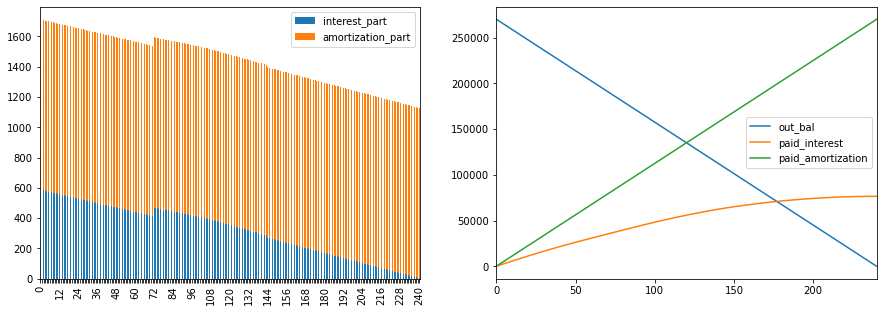

In [11]:
df = main_calc(
    term_type="even_principal",
    outs=270000,
    n=20,
    p=12,
    rate_path=per_annum_rate_path
)
statistics(df)

In [12]:
df

,year,out_bal,interest_part,amortization_part,installment,int_share,amort_share,paid_interest,paid_amortization,paid_installments
0,0.0000,270000.0000,nan,nan,nan,nan,nan,nan,nan,nan
1,1.0000,268875.0000,585.0000,1125.0000,1710.0000,0.3421,0.6579,585.0000,1125.0000,1710.0000
2,2.0000,267750.0000,582.5625,1125.0000,1707.5625,0.3412,0.6588,1167.5625,2250.0000,3417.5625
3,3.0000,266625.0000,580.1250,1125.0000,1705.1250,0.3402,0.6598,1747.6875,3375.0000,5122.6875
4,4.0000,265500.0000,577.6875,1125.0000,1702.6875,0.3393,0.6607,2325.3750,4500.0000,6825.3750
5,5.0000,264375.0000,575.2500,1125.0000,1700.2500,0.3383,0.6617,2900.6250,5625.0000,8525.6250
6,6.0000,263250.0000,572.8125,1125.0000,1697.8125,0.3374,0.6626,3473.4375,6750.0000,10223.4375
7,7.0000,262125.0000,570.3750,1125.0000,1695.3750,0.3364,0.6636,4043.8125,7875.0000,11918.8125
8,8.0000,261000.0000,567.9375,1125.0000,1692.9375,0.3355,0.6645,4611.7500,9000.0000,13611.7500
9,9.0000,259875.0000,565.5000,1125.0000,1690.5000,0.3345,0.6655,5177.2500,10125.0000,15302.2500


### Even total installment
https://www.extension.iastate.edu/agdm/wholefarm/html/c5-93.html

This is tricky as maturity will change as well.